In [1]:
import csv
import numpy as np
import pandas as pd

In [2]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1500)
pd.set_option('display.width', 1000)

Reading in the cleaned DataFrame with added features.

In [3]:
cancer = pd.read_csv('cancer_ml5.csv', index_col=['Geography'])

In [4]:
cancer.shape

(3047, 248)

In [5]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3047 entries, Abbeville County, South Carolina to Zavala County, Texas
Columns: 248 entries, avgAnnCount to PCT_LACCESS_HHNV10_sqrd
dtypes: bool(66), float64(141), int64(41)
memory usage: 4.4+ MB


In [6]:
cancer.head()

,avgAnnCount,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,PctSomeCol18_24_isnull,PctEmployed16_Over_isnull,PctPrivateCoverageAlone_isnull,age_gt_100,household_lt_1,"binnedInc_(34218.1, 37413.8]","binnedInc_(37413.8, 40362.7]","binnedInc_(40362.7, 42724.4]","binnedInc_(42724.4, 45201]","binnedInc_(45201, 48021.6]","binnedInc_(48021.6, 51046.4]","binnedInc_(51046.4, 54545.6]","binnedInc_(54545.6, 61494.5]","binnedInc_(61494.5, 125635]","binnedInc_[22640, 34218.1]",ALAND_SQMI,AWATER_SQMI,INTPTLAT,INTPTLONG,utmda_l1,mskcc_l1,mayo_l1,hopkins_l1,dfb_l1,cleveland_l1,upmcps_l1,hlmcc_l1,mgs_l1,nw_mem_l1,chi_l1,nyc_l1,atlanta_l1,dallas_l1,denver_l1,los_ang_l1,seattle_l1,san_fran_l1,utmda_l2,mskcc_l2,mayo_l2,hopkins_l2,dfb_l2,cleveland_l2,upmcps_l2,hlmcc_l2,mgs_l2,nw_mem_l2,chi_l2,nyc_l2,atlanta_l2,dallas_l2,denver_l2,los_ang_l2,seattle_l2,san_fran_l2,onc_min_distsl1,onc_min_distsl2,city_min_distsl1,city_min_distsl2,sc_min_dists_l1,sc_min_dists_l2,PCT_LACCESS_POP10,PCT_LACCESS_LOWI10,PCT_LACCESS_CHILD10,PCT_LACCESS_SENIORS10,PCT_LACCESS_HHNV10,PCT_LACCESS_POP10_isnull,PCT_LACCESS_LOWI10_isnull,PCT_LACCESS_CHILD10_isnull,PCT_LACCESS_SENIORS10_isnull,PCT_LACCESS_HHNV10_isnull,FOODINSEC_00_02,FOODINSEC_07_09,FOODINSEC_10_12,CH_FOODINSEC_02_12,CH_FOODINSEC_09_12,VLFOODSEC_00_02,VLFOODSEC_07_09,VLFOODSEC_10_12,CH_VLFOODSEC_02_12,CH_VLFOODSEC_09_12,FOODINSEC_CHILD_01_07,FOODINSEC_CHILD_03_11,FOODINSEC_00_02_isnull,FOODINSEC_07_09_isnull,FOODINSEC_10_12_isnull,CH_FOODINSEC_02_12_isnull,CH_FOODINSEC_09_12_isnull,VLFOODSEC_00_02_isnull,VLFOODSEC_07_09_isnull,VLFOODSEC_10_12_isnull,CH_VLFOODSEC_02_12_isnull,CH_VLFOODSEC_09_12_isnull,FOODINSEC_CHILD_01_07_isnull,FOODINSEC_CHILD_03_11_isnull,PCT_LOCLFARM07,PCT_LOCLSALE07,PC_DIRSALES07,FMRKT09,FMRKT13,PCH_FMRKT_09_13,FMRKTPTH09,FMRKTPTH13,PCH_FMRKTPTH_09_13,PCT_FMRKT_SNAP13,PCT_FMRKT_WIC13,PCT_FMRKT_WICCASH13,PCT_FMRKT_SFMNP13,PCT_FRMKT_FRVEG13,PCT_FRMKT_ANMLPROD13,PCT_FMRKT_OTHER13,VEG_FARMS07,VEG_ACRES07,VEG_ACRESPTH07,FRESHVEG_FARMS07,FRESHVEG_ACRES07,FRESHVEG_ACRESPTH07,ORCHARD_FARMS07,ORCHARD_ACRES07,ORCHARD_ACRESPTH07,BERRY_FARMS07,BERRY_ACRES07,BERRY_ACRESPTH07,SLHOUSE07,GHVEG_FARMS07,GHVEG_SQFT07,GHVEG_SQFTPTH07,FOODHUB12,CSA07,AGRITRSM_OPS07,AGRITRSM_RCT07,FARM_TO_SCHOOL,PCT_LOCLFARM07_isnull,PCT_LOCLSALE07_isnull,PC_DIRSALES07_isnull,FMRKT09_isnull,FMRKT13_isnull,PCH_FMRKT_09_13_isnull,FMRKTPTH09_isnull,FMRKTPTH13_isnull,PCH_FMRKTPTH_09_13_isnull,PCT_FMRKT_SNAP13_isnull,PCT_FMRKT_WIC13_isnull,PCT_FMRKT_WICCASH13_isnull,PCT_FMRKT_SFMNP13_isnull,PCT_FRMKT_FRVEG13_isnull,PCT_FRMKT_ANMLPROD13_isnull,PCT_FMRKT_OTHER13_isnull,VEG_FARMS07_isnull,VEG_ACRES07_isnull,VEG_ACRESPTH07_isnull,FRESHVEG_FARMS07_isnull,FRESHVEG_ACRES07_isnull,FRESHVEG_ACRESPTH07_isnull,ORCHARD_FARMS07_isnull,ORCHARD_ACRES07_isnull,ORCHARD_ACRESPTH07_isnull,BERRY_FARMS07_isnull,BERRY_ACRES07_isnull,BERRY_ACRESPTH07_isnull,SLHOUSE07_isnull,GHVEG_FARMS07_isnull,GHVEG_SQFT07_isnull,GHVEG_SQFTPTH07_isnull,FOODHUB12_isnull,CSA07_isnull,AGRITRSM_OPS07_isnull,AGRITRSM_RCT07_isnull,FARM_TO_SCHOOL_isnull,PCT_DIABETES_ADULTS09,PCT_DIABETES_ADULTS10,PCT_OBESE_ADULTS09,PCT_OBESE_ADULTS10,PCT_OBESE_ADULTS13,PCT_OBESE_CHILD08,PCT_OBESE_CHILD11,PCH_OBESE_CHILD_08_11,PCT_HSPA09,RECFAC07,RECFAC12,PCH_RECFAC_07_12,RECFACPTH07,RECFACPTH12,PCH_RECFACPTH_07_12,NATAMEN,PCT_OBESE_CHILD08_isnull,PCT_OBESE_CHILD11_isnull,PCH_OBESE_CHILD_08_11_isnull,PCT_HSPA09_isnull,PCH_RECFAC_07_12_isnull,PCH_RECFACPTH_07_12_isnull,NATAMEN_isnull,PERPOV10,CHILDPOVRATE10,PERCHLDPOV10,METRO13,POPLOSS00,avgAnnCount_sqrd,medIncome_sqrd,popEst2015_sqrd,povertyPercent_lo

In [7]:
cancer.describe()

,avgAnnCount,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,"binnedInc_(34218.1, 37413.8]","binnedInc_(37413.8, 40362.7]","binnedInc_(40362.7, 42724.4]","binnedInc_(42724.4, 45201]","binnedInc_(45201, 48021.6]","binnedInc_(48021.6, 51046.4]","binnedInc_(51046.4, 54545.6]","binnedInc_(54545.6, 61494.5]","binnedInc_(61494.5, 125635]","binnedInc_[22640, 34218.1]",ALAND_SQMI,AWATER_SQMI,INTPTLAT,INTPTLONG,utmda_l1,mskcc_l1,mayo_l1,hopkins_l1,dfb_l1,cleveland_l1,upmcps_l1,hlmcc_l1,mgs_l1,nw_mem_l1,chi_l1,nyc_l1,atlanta_l1,dallas_l1,denver_l1,los_ang_l1,seattle_l1,san_fran_l1,utmda_l2,mskcc_l2,mayo_l2,hopkins_l2,dfb_l2,cleveland_l2,upmcps_l2,hlmcc_l2,mgs_l2,nw_mem_l2,chi_l2,nyc_l2,atlanta_l2,dallas_l2,denver_l2,los_ang_l2,seattle_l2,san_fran_l2,onc_min_distsl1,onc_min_distsl2,city_min_distsl1,city_min_distsl2,sc_min_dists_l1,sc_min_dists_l2,PCT_LACCESS_POP10,PCT_LACCESS_LOWI10,PCT_LACCESS_CHILD10,PCT_LACCESS_SENIORS10,PCT_LACCESS_HHNV10,FOODINSEC_00_02,FOODINSEC_07_09,FOODINSEC_10_12,CH_FOODINSEC_02_12,CH_FOODINSEC_09_12,VLFOODSEC_00_02,VLFOODSEC_07_09,VLFOODSEC_10_12,CH_VLFOODSEC_02_12,CH_VLFOODSEC_09_12,FOODINSEC_CHILD_01_07,FOODINSEC_CHILD_03_11,PCT_LOCLFARM07,PCT_LOCLSALE07,PC_DIRSALES07,FMRKT09,FMRKT13,PCH_FMRKT_09_13,FMRKTPTH09,FMRKTPTH13,PCH_FMRKTPTH_09_13,PCT_FMRKT_SNAP13,PCT_FMRKT_WIC13,PCT_FMRKT_WICCASH13,PCT_FMRKT_SFMNP13,PCT_FRMKT_FRVEG13,PCT_FRMKT_ANMLPROD13,PCT_FMRKT_OTHER13,VEG_FARMS07,VEG_ACRES07,VEG_ACRESPTH07,FRESHVEG_FARMS07,FRESHVEG_ACRES07,FRESHVEG_ACRESPTH07,ORCHARD_FARMS07,ORCHARD_ACRES07,ORCHARD_ACRESPTH07,BERRY_FARMS07,BERRY_ACRES07,BERRY_ACRESPTH07,SLHOUSE07,GHVEG_FARMS07,GHVEG_SQFT07,GHVEG_SQFTPTH07,FOODHUB12,CSA07,AGRITRSM_OPS07,AGRITRSM_RCT07,FARM_TO_SCHOOL,PCT_DIABETES_ADULTS09,PCT_DIABETES_ADULTS10,PCT_OBESE_ADULTS09,PCT_OBESE_ADULTS10,PCT_OBESE_ADULTS13,PCT_OBESE_CHILD08,PCT_OBESE_CHILD11,PCH_OBESE_CHILD_08_11,PCT_HSPA09,RECFAC07,RECFAC12,PCH_RECFAC_07_12,RECFACPTH07,RECFACPTH12,PCH_RECFACPTH_07_12,NATAMEN,PERPOV10,CHILDPOVRATE10,PERCHLDPOV10,METRO13,POPLOSS00,avgAnnCount_sqrd,medIncome_sqrd,popEst2015_sqrd,povertyPercent_log,studyPerCap_sqrd,MedianAge_log,MedianAgeFemale_sqrd,PercentMarried_log,PctEmployed16_Over_log,PctUnemployed16_Over_sqrd,PctPrivateCoverage_log,PctPrivateCoverage_sqrd,PctEmpPrivCoverage_log,PctPublicCoverageAlone_log,BirthRate_sqrd,INTPTLONG_sqrd,onc_min_distsl2_sqrd,city_min_distsl1_log,PCT_LACCESS_POP10_sqrd,PCT_LACCESS_HHNV10_sqrd
count,3047.000000,3047.000000,3047.000000,3047.000000,3.047000e+03,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,

In [8]:
cancer.columns

Index(['avgAnnCount', 'TARGET_deathRate', 'incidenceRate', 'medIncome', 'popEst2015', 'povertyPercent', 'studyPerCap', 'MedianAge', 'MedianAgeMale', 'MedianAgeFemale',
       ...
       'PctPrivateCoverage_log', 'PctPrivateCoverage_sqrd', 'PctEmpPrivCoverage_log', 'PctPublicCoverageAlone_log', 'BirthRate_sqrd', 'INTPTLONG_sqrd', 'onc_min_distsl2_sqrd', 'city_min_distsl1_log', 'PCT_LACCESS_POP10_sqrd', 'PCT_LACCESS_HHNV10_sqrd'], dtype='object', length=248)

Checking for duplicate rows in the DataFrame

In [9]:
cancer = cancer.drop_duplicates()
cancer.shape

(3047, 248)

Checking for variables with missing values, using both the .isnull().sum() and .isna().sum() chained methods.

A list of all the columns with missing values is called.

In [10]:
null_value_columns = list(cancer.columns[(cancer.isnull().sum()>0) | (cancer.isna().sum()>0)])
null_value_columns

[]

## Mining Logarithmic and Exponential Transformations of the Feature Set for Increased Accuracy

The next series of cells looks for extra information left in the feature set that the model won't be able utilize in a linear fashion to make a good fit. This can be done by looking for non-linear patterns in plots of the actual values of each individual feature and the actual target variable values, overlaid with plots of the actual values of each individual feature against the predicted target variable values. Additionally, a plot of the actual values of each individual feature and the residuals will be executed. Logarithmic and exponential versions of each feature will be investigated for their contribution to the predictive power of the model. 

In [11]:
import matplotlib.pyplot as plt
import sklearn
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [12]:
lr = linear_model.LinearRegression()
lr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [13]:
y = cancer['TARGET_deathRate']

In [14]:
target_name = ['TARGET_deathRate']
X = cancer[[cn for cn in cancer.columns if cn not in target_name]]

In [15]:
X.columns

Index(['avgAnnCount', 'incidenceRate', 'medIncome', 'popEst2015', 'povertyPercent', 'studyPerCap', 'MedianAge', 'MedianAgeMale', 'MedianAgeFemale', 'AvgHouseholdSize',
       ...
       'PctPrivateCoverage_log', 'PctPrivateCoverage_sqrd', 'PctEmpPrivCoverage_log', 'PctPublicCoverageAlone_log', 'BirthRate_sqrd', 'INTPTLONG_sqrd', 'onc_min_distsl2_sqrd', 'city_min_distsl1_log', 'PCT_LACCESS_POP10_sqrd', 'PCT_LACCESS_HHNV10_sqrd'], dtype='object', length=247)

## 'FOODINSEC_00_02': Household food insecurity (%, three-year average), 2000-02

In [16]:
X50 = np.array(cancer['FOODINSEC_00_02'])
X50 = X50.reshape(-1, 1)

In [17]:
lr.fit(X50, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [18]:
lr.score(X50, y)

0.0037453049866953414

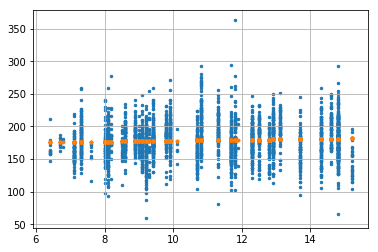

In [19]:
plt.scatter(X50, y, s=6)
plt.scatter(X50, lr.predict(X50), s=6)
plt.grid()

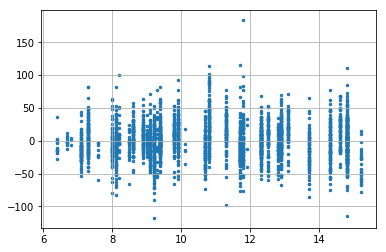

In [20]:
plt.scatter(X50, y - lr.predict(X50), s=6)
plt.grid()

In [21]:
X50.shape

(3047, 1)

In [22]:
dfx50 = pd.DataFrame(X50)
dfx50.head()

,0
0,12.3
1,13.1
2,7.3
3,13.7
4,9.1


In [23]:
dfx50['FOODINSEC_00_02_log'] = np.log(X50)

In [24]:
dfx50.head()

,0,FOODINSEC_00_02_log
0,12.3,2.509599
1,13.1,2.572612
2,7.3,1.987874
3,13.7,2.617396
4,9.1,2.208274


In [25]:
lr.fit(dfx50, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [26]:
lr.score(dfx50, y)

0.009404104274054692

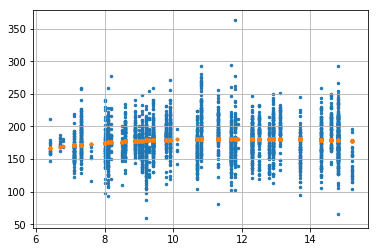

In [27]:
plt.scatter(X50, y, s=6) 
plt.scatter(X50, lr.predict(dfx50), s=6)
plt.grid()

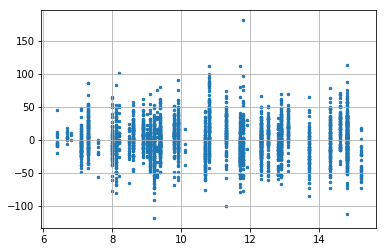

In [28]:
plt.scatter(X50, y - lr.predict(dfx50), s=6)
plt.grid()

In [29]:
dfx50['FOODINSEC_00_02_sqrd'] = X50**2

In [30]:
dfx50.head()

,0,FOODINSEC_00_02_log,FOODINSEC_00_02_sqrd
0,12.3,2.509599,151.29
1,13.1,2.572612,171.61
2,7.3,1.987874,53.29
3,13.7,2.617396,187.69
4,9.1,2.208274,82.81


In [31]:
lr.fit(dfx50, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [32]:
lr.score(dfx50, y)

0.009466064743598235

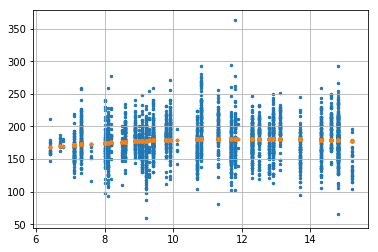

In [33]:
plt.scatter(X50, y, s=6) 
plt.scatter(X50, lr.predict(dfx50), s=6)
plt.grid()

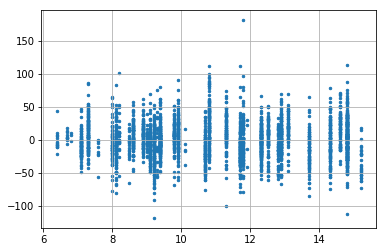

In [34]:
plt.scatter(X50, y - lr.predict(dfx50), s=6)
plt.grid()

In [35]:
X['FOODINSEC_00_02_log'] = np.log(X['FOODINSEC_00_02'])

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [38]:
lr.score(X_test, y_test)

0.5913806769645711

The logarithmic version resulted in a decrease in accuracy, so it is dropped from X.

In [39]:
X = X.drop(columns = 'FOODINSEC_00_02_log')

In [40]:
X['FOODINSEC_00_02_sqrd'] = X['FOODINSEC_00_02']**2

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [43]:
lr.score(X_test, y_test)

0.5991225167210716

The squared version resulted in a decrease in accuracy, so it is dropped from X.

In [44]:
X = X.drop(columns = 'FOODINSEC_00_02_sqrd')

## 'FOODINSEC_07_09': Household food insecurity (%, three-year average), 2007-09

In [45]:
X51 = np.array(cancer['FOODINSEC_07_09'])
X51 = X51.reshape(-1, 1)

In [46]:
lr.fit(X51, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [47]:
lr.score(X51, y)

0.020534348170914374

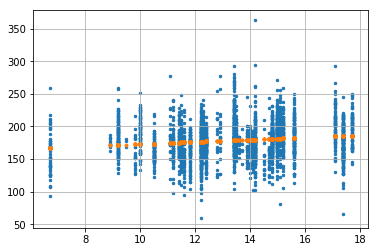

In [48]:
plt.scatter(X51, y, s=6)
plt.scatter(X51, lr.predict(X51), s=6)
plt.grid()

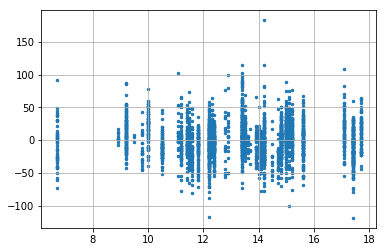

In [49]:
plt.scatter(X51, y - lr.predict(X51), s=6)
plt.grid()

In [50]:
X51.shape

(3047, 1)

In [51]:
dfx51 = pd.DataFrame(X51)
dfx51.head()

,0
0,13.5
1,10.0
2,9.2
3,11.6
4,11.5


In [52]:
dfx51['FOODINSEC_07_09_log'] = np.log(X51)

In [53]:
dfx51.head()

,0,FOODINSEC_07_09_log
0,13.5,2.602690
1,10.0,2.302585
2,9.2,2.219203
3,11.6,2.451005
4,11.5,2.442347


In [54]:
lr.fit(dfx51, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [55]:
lr.score(dfx51, y)

0.020575759875352873

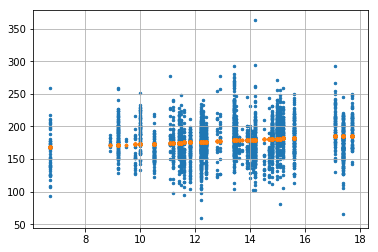

In [56]:
plt.scatter(X51, y, s=6) 
plt.scatter(X51, lr.predict(dfx51), s=6)
plt.grid()

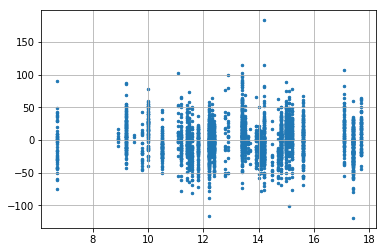

In [57]:
plt.scatter(X51, y - lr.predict(dfx51), s=6)
plt.grid()

In [58]:
dfx51['FOODINSEC_07_09_sqrd'] = X51**2

In [59]:
dfx51.head()

,0,FOODINSEC_07_09_log,FOODINSEC_07_09_sqrd
0,13.5,2.602690,182.25
1,10.0,2.302585,100.00
2,9.2,2.219203,84.64
3,11.6,2.451005,134.56
4,11.5,2.442347,132.25


In [60]:
lr.fit(dfx51, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [61]:
lr.score(dfx51, y)

0.02061503630205075

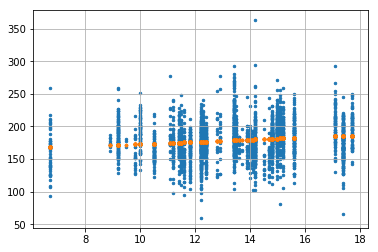

In [62]:
plt.scatter(X51, y, s=6) 
plt.scatter(X51, lr.predict(dfx51), s=6)
plt.grid()

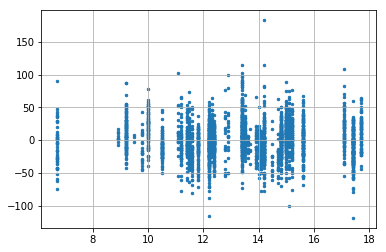

In [63]:
plt.scatter(X51, y - lr.predict(dfx51), s=6)
plt.grid()

In [64]:
X['FOODINSEC_07_09_log'] = np.log(X['FOODINSEC_07_09'])

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [67]:
lr.score(X_test, y_test)

0.5951997720302667

The logarithmic version resulted in a decrease in accuracy, so it is dropped from X.

In [68]:
X = X.drop(columns = 'FOODINSEC_07_09_log')

In [69]:
X['FOODINSEC_07_09_sqrd'] = X['FOODINSEC_07_09']**2

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [72]:
lr.score(X_test, y_test)

0.6018286040379257

The squared version also resulted in a decrease in accuracy, so it is dropped from X.

In [73]:
X = X.drop(columns = 'FOODINSEC_07_09_sqrd')

## 'FOODINSEC_10_12': Household food insecurity (%, three-year average), 2010-12

In [74]:
X52 = np.array(cancer['FOODINSEC_10_12'])
X52 = X52.reshape(-1, 1)

In [75]:
lr.fit(X52, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [76]:
lr.score(X52, y)

0.03209331902546175

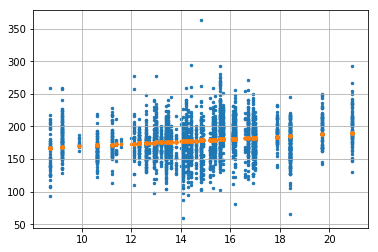

In [77]:
plt.scatter(X52, y, s=6)
plt.scatter(X52, lr.predict(X52), s=6)
plt.grid()

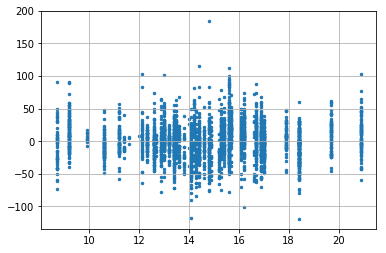

In [78]:
plt.scatter(X52, y - lr.predict(X52), s=6)
plt.grid()

In [79]:
X52.shape

(3047, 1)

In [80]:
dfx52 = pd.DataFrame(X52)
dfx52.head()

,0
0,15.4
1,15.7
2,9.2
3,14.3
4,12.6


In [81]:
dfx52['FOODINSEC_10_12_log'] = np.log(X52)

In [82]:
dfx52.head()

,0,FOODINSEC_10_12_log
0,15.4,2.734368
1,15.7,2.753661
2,9.2,2.219203
3,14.3,2.660260
4,12.6,2.533697


In [83]:
lr.fit(dfx52, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [84]:
lr.score(dfx52, y)

0.03702839594469565

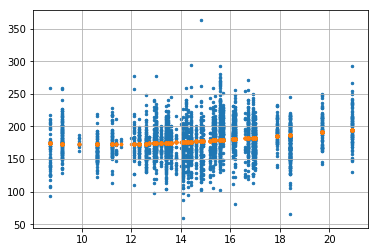

In [85]:
plt.scatter(X52, y, s=6) 
plt.scatter(X52, lr.predict(dfx52), s=6)
plt.grid()

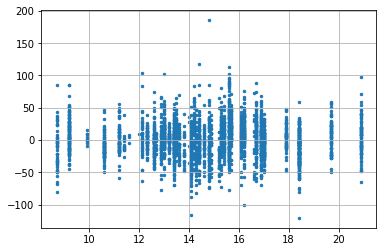

In [86]:
plt.scatter(X52, y - lr.predict(dfx52), s=6)
plt.grid()

In [87]:
dfx52['FOODINSEC_10_12_sqrd'] = X52**2

In [88]:
dfx52.head()

,0,FOODINSEC_10_12_log,FOODINSEC_10_12_sqrd
0,15.4,2.734368,237.16
1,15.7,2.753661,246.49
2,9.2,2.219203,84.64
3,14.3,2.660260,204.49
4,12.6,2.533697,158.76


In [89]:
lr.fit(dfx52, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [90]:
lr.score(dfx52, y)

0.037171143867702705

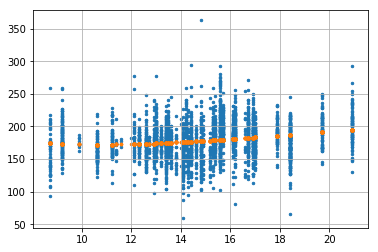

In [91]:
plt.scatter(X52, y, s=6) 
plt.scatter(X52, lr.predict(dfx52), s=6)
plt.grid()

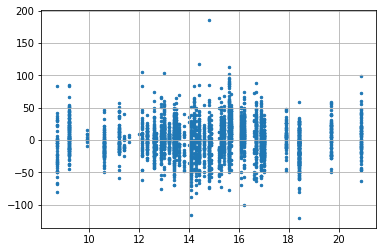

In [92]:
plt.scatter(X52, y - lr.predict(dfx52), s=6)
plt.grid()

In [93]:
X['FOODINSEC_10_12_log'] = np.log(X['FOODINSEC_10_12'])

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [95]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [96]:
lr.score(X_test, y_test)

0.6026770350223363

The logarithmic version resulted in a decrease in accuracy, so it is dropped from X.

In [97]:
X = X.drop(columns = 'FOODINSEC_10_12_log')

In [98]:
X['FOODINSEC_10_12_sqrd'] = X['FOODINSEC_10_12']**2

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [100]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [101]:
lr.score(X_test, y_test)

0.6000113235735254

The squared version also resulted in a decrease in accuracy, so it is dropped from X.

In [102]:
X = X.drop(columns = 'FOODINSEC_10_12_sqrd')

## 'CH_FOODINSEC_02_12': Household food insecurity (change %), 2000-02 to 2010-12

In [103]:
X53 = np.array(cancer['CH_FOODINSEC_02_12'])
X53 = X53.reshape(-1, 1)

In [104]:
lr.fit(X53, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [105]:
lr.score(X53, y)

0.0440380934282526

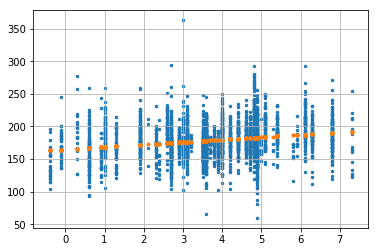

In [106]:
plt.scatter(X53, y, s=6)
plt.scatter(X53, lr.predict(X53), s=6)
plt.grid()

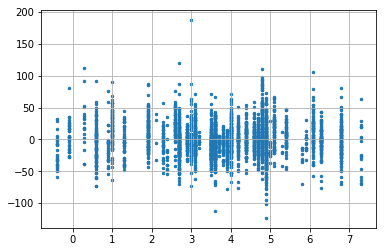

In [107]:
plt.scatter(X53, y - lr.predict(X53), s=6)
plt.grid()

In [108]:
X53.shape

(3047, 1)

In [109]:
dfx53 = pd.DataFrame(X53)
dfx53.head()

,0
0,3.1
1,2.6
2,1.9
3,0.6
4,3.5


There are zero values in 'CH_FOODINSEC_02_12', so a log version cannot be made.

In [110]:
dfx53['CH_FOODINSEC_02_12_sqrd'] = X53**2

In [111]:
dfx53.head()

,0,CH_FOODINSEC_02_12_sqrd
0,3.1,9.61
1,2.6,6.76
2,1.9,3.61
3,0.6,0.36
4,3.5,12.25


In [112]:
lr.fit(dfx53, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [113]:
lr.score(dfx53, y)

0.0443961451739312

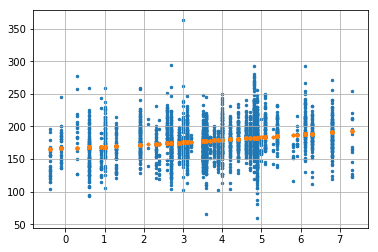

In [114]:
plt.scatter(X53, y, s=6) 
plt.scatter(X53, lr.predict(dfx53), s=6)
plt.grid()

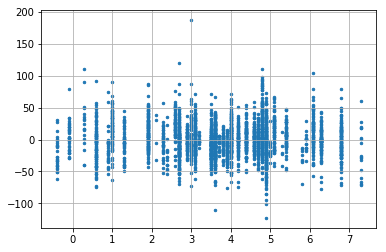

In [115]:
plt.scatter(X53, y - lr.predict(dfx53), s=6)
plt.grid()

In [116]:
X['CH_FOODINSEC_02_12_sqrd'] = X['CH_FOODINSEC_02_12']**2

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [118]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [119]:
lr.score(X_test, y_test)

0.599617073711041

The squared version also resulted in a decrease in accuracy, so it is dropped from X.

In [120]:
X = X.drop(columns = 'CH_FOODINSEC_02_12_sqrd')

## 'PCT_LOCLFARM07': Farms with direct sales (%), 2007

In [121]:
X54 = np.array(cancer['PCT_LOCLFARM07'])
X54 = X54.reshape(-1, 1)

In [122]:
lr.fit(X54, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [123]:
lr.score(X54, y)

0.007986295287849221

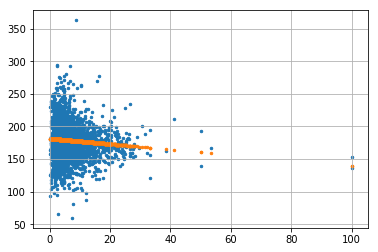

In [124]:
plt.scatter(X54, y, s=6)
plt.scatter(X54, lr.predict(X54), s=6)
plt.grid()

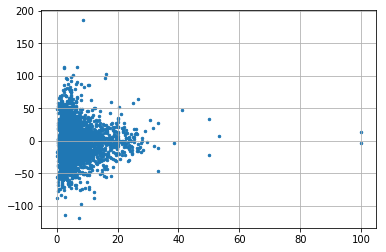

In [125]:
plt.scatter(X54, y - lr.predict(X54), s=6)
plt.grid()

In [126]:
X54.shape

(3047, 1)

In [127]:
dfx54 = pd.DataFrame(X54)
dfx54.head()

,0
0,6.9
1,2.0
2,6.5
3,16.6
4,2.5


There are zero values in 'PCT_LOCLFARM07', so a log version cannot be created.

In [128]:
dfx54['PCT_LOCLFARM07_sqrd'] = X54**2

In [129]:
dfx54.head()

,0,PCT_LOCLFARM07_sqrd
0,6.9,47.61
1,2.0,4.00
2,6.5,42.25
3,16.6,275.56
4,2.5,6.25


In [130]:
lr.fit(dfx54, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [131]:
lr.score(dfx54, y)

0.008048817514945239

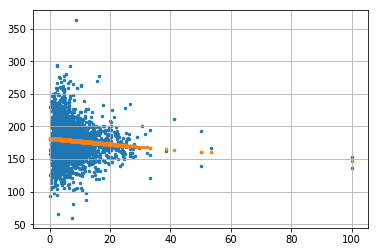

In [132]:
plt.scatter(X54, y, s=6) 
plt.scatter(X54, lr.predict(dfx54), s=6)
plt.grid()

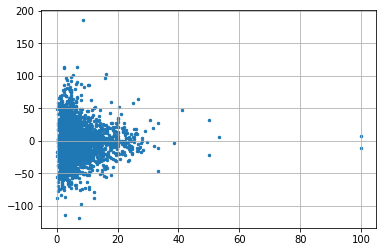

In [133]:
plt.scatter(X54, y - lr.predict(dfx54), s=6)
plt.grid()

In [134]:
X['PCT_LOCLFARM07_sqrd'] = X['PCT_LOCLFARM07']**2

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [136]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [137]:
lr.score(X_test, y_test)

0.5997300314822187

The squared version also resulted in a decrease in accuracy, so it is dropped from X.

In [138]:
X = X.drop(columns = 'PCT_LOCLFARM07_sqrd')

## 'PCT_LOCLSALE07': Direct farm sales (%), 2007

In [139]:
X55 = np.array(cancer['PCT_LOCLSALE07'])
X55 = X55.reshape(-1, 1)

In [140]:
lr.fit(X55, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [141]:
lr.score(X55, y)

0.00028215635416428686

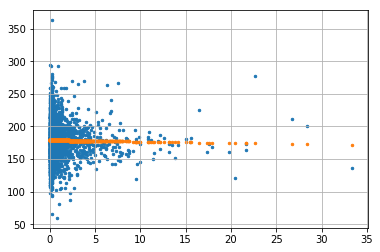

In [142]:
plt.scatter(X55, y, s=6)
plt.scatter(X55, lr.predict(X55), s=6)
plt.grid()

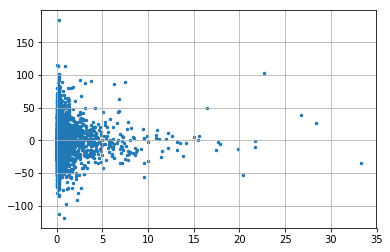

In [143]:
plt.scatter(X55, y - lr.predict(X55), s=6)
plt.grid()

In [144]:
X55.shape

(3047, 1)

In [145]:
dfx55 = pd.DataFrame(X55)
dfx55.head()

,0
0,0.9
1,0.7
2,0.0
3,0.6
4,0.0


There are zero values in 'PCT_LOCLSALE07', so a log version cannot be created.

In [146]:
dfx55['PCT_LOCLSALE07_sqrd'] = X55**2

In [147]:
dfx55.head()

,0,PCT_LOCLSALE07_sqrd
0,0.9,0.81
1,0.7,0.49
2,0.0,0.00
3,0.6,0.36
4,0.0,0.00


In [148]:
lr.fit(dfx55, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [149]:
lr.score(dfx55, y)

0.00033810869283668055

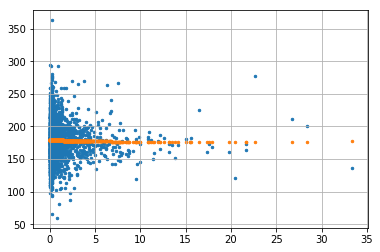

In [150]:
plt.scatter(X55, y, s=6) 
plt.scatter(X55, lr.predict(dfx55), s=6)
plt.grid()

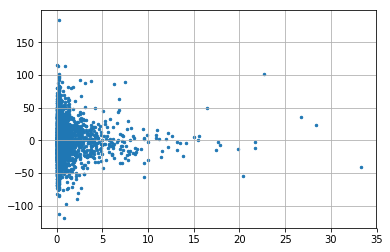

In [151]:
plt.scatter(X55, y - lr.predict(dfx55), s=6)
plt.grid()

In [152]:
X['PCT_LOCLSALE07_sqrd'] = X['PCT_LOCLSALE07']**2

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [154]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [155]:
lr.score(X_test, y_test)

0.5993235488889151

The squared version resulted in a decrease in accuracy, so it is dropped from X.

In [156]:
X = X.drop(columns = 'PCT_LOCLSALE07_sqrd')

## 'PC_DIRSALES07': Direct farm sales per capita, 2007

In [157]:
X56 = np.array(cancer['PC_DIRSALES07'])
X56 = X56.reshape(-1, 1)

In [158]:
lr.fit(X56, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [159]:
lr.score(X56, y)

0.012102830994781044

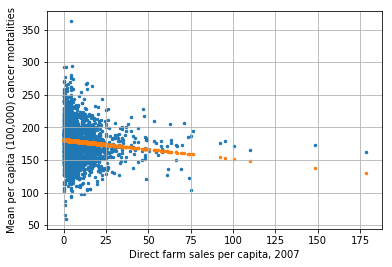

In [160]:
plt.scatter(X56, y, s=6)
plt.scatter(X56, lr.predict(X56), s=6)
plt.grid()
plt.xlabel("Direct farm sales per capita, 2007", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities", fontsize=10)
plt.savefig('PC_DIRSALES07_actual_&_predicted_Y.png')

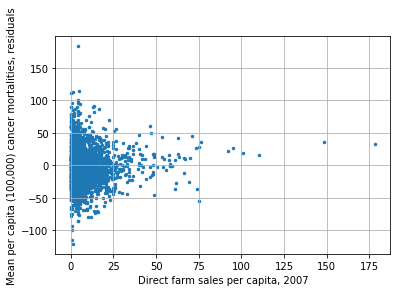

In [161]:
plt.scatter(X56, y - lr.predict(X56), s=6)
plt.grid()
plt.xlabel("Direct farm sales per capita, 2007", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities, residuals", fontsize=10)
plt.savefig('PC_DIRSALES07_residuals.png')

In [162]:
X56.shape

(3047, 1)

In [163]:
dfx56 = pd.DataFrame(X56)
dfx56.head()

,0
0,3.73
1,7.68
2,1.72
3,2.29
4,6.95


There are zero values in 'PC_DIRSALES07', so a log version cannot be created.

In [164]:
dfx56['PC_DIRSALES07_sqrd'] = X56**2

In [165]:
dfx56.head()

,0,PC_DIRSALES07_sqrd
0,3.73,13.9129
1,7.68,58.9824
2,1.72,2.9584
3,2.29,5.2441
4,6.95,48.3025


In [166]:
lr.fit(dfx56, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [167]:
lr.score(dfx56, y)

0.01622735402782538

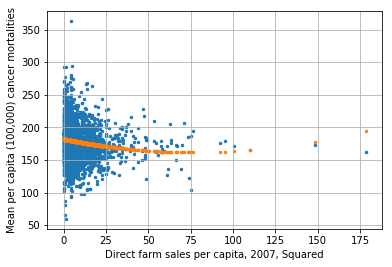

In [168]:
plt.scatter(X56, y, s=6) 
plt.scatter(X56, lr.predict(dfx56), s=6)
plt.grid()
plt.xlabel("Direct farm sales per capita, 2007, Squared", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities", fontsize=10)
plt.savefig('PC_DIRSALES07_squared_actual_&_predicted_Y.png')

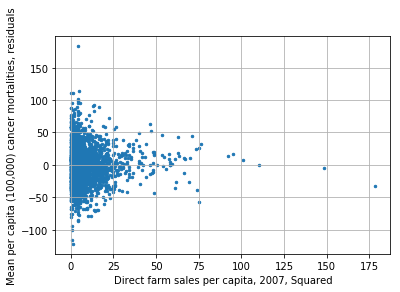

In [169]:
plt.scatter(X56, y - lr.predict(dfx56), s=6)
plt.grid()
plt.xlabel("Direct farm sales per capita, 2007, Squared", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities, residuals", fontsize=10)
plt.savefig('PC_DIRSALES07_squared_residuals.png')

In [170]:
X['PC_DIRSALES07_sqrd'] = X['PC_DIRSALES07']**2

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [172]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [173]:
lr.score(X_test, y_test)

0.6052641232222307

The squared version resulted in an increase in accuracy, so it is added to the core feature set.

In [174]:
cancer['PC_DIRSALES07_sqrd'] = cancer['PC_DIRSALES07']**2

## 'FMRKT09': Farmers' markets, 2009

In [175]:
X57 = np.array(cancer['FMRKT09'])
X57 = X57.reshape(-1, 1)

In [176]:
lr.fit(X57, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [177]:
lr.score(X57, y)

0.019536251503185942

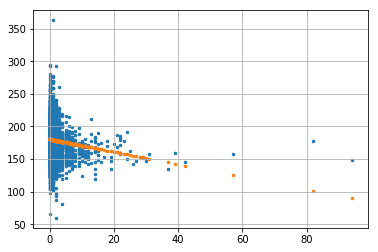

In [178]:
plt.scatter(X57, y, s=6)
plt.scatter(X57, lr.predict(X57), s=6)
plt.grid()

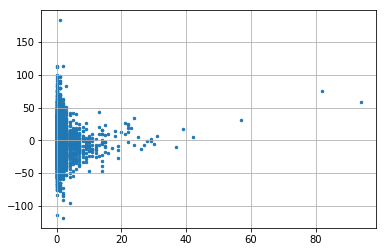

In [179]:
plt.scatter(X57, y - lr.predict(X57), s=6)
plt.grid()

In [180]:
X57.shape

(3047, 1)

In [181]:
dfx57 = pd.DataFrame(X57)
dfx57.head()

,0
0,2
1,0
2,1
3,9
4,2


There are zero values in 'FMRKT09', so a log version cannot be created.

In [182]:
dfx57['FMRKT09_sqrd'] = X57**2

In [183]:
dfx57.head()

,0,FMRKT09_sqrd
0,2,4
1,0,0
2,1,1
3,9,81
4,2,4


In [184]:
lr.fit(dfx57, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [185]:
lr.score(dfx57, y)

0.028406703658694354

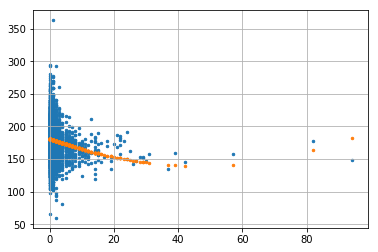

In [186]:
plt.scatter(X57, y, s=6) 
plt.scatter(X57, lr.predict(dfx57), s=6)
plt.grid()

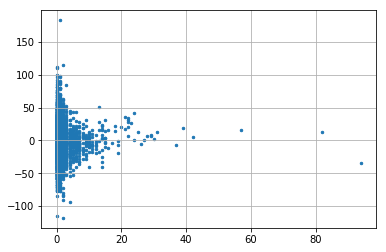

In [187]:
plt.scatter(X57, y - lr.predict(dfx57), s=6)
plt.grid()

In [188]:
X['FMRKT09_sqrd'] = X['FMRKT09']**2

In [189]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [190]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [191]:
lr.score(X_test, y_test)

0.6016017279184087

The squared version resulted in a decrease in accuracy, so it is dropped from X.

In [192]:
X = X.drop(columns = 'FMRKT09_sqrd')

## 'PCT_FRMKT_FRVEG13': Farmers' markets that report selling fruit & vegetables (%), 2013

In [193]:
X58 = np.array(cancer['PCT_FRMKT_FRVEG13'])
X58 = X58.reshape(-1, 1)

In [194]:
lr.fit(X58, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [195]:
lr.score(X58, y)

0.00023012627396234997

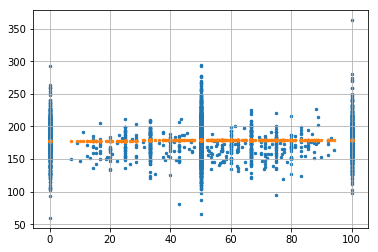

In [196]:
plt.scatter(X58, y, s=6)
plt.scatter(X58, lr.predict(X58), s=6)
plt.grid()

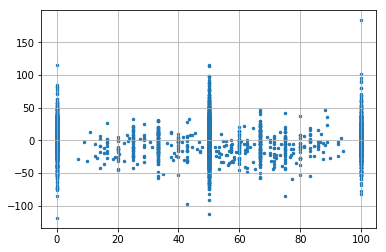

In [197]:
plt.scatter(X58, y - lr.predict(X58), s=6)
plt.grid()

In [198]:
X58.shape

(3047, 1)

In [199]:
dfx58 = pd.DataFrame(X58)
dfx58.head()

,0
0,50.0
1,50.0
2,100.0
3,80.0
4,0.0


There are zero values in 'PCT_FRMKT_FRVEG13', so a log version cannot be created.

In [200]:
dfx58['PCT_FRMKT_FRVEG13_sqrd'] = X58**2

In [201]:
dfx58.head()

,0,PCT_FRMKT_FRVEG13_sqrd
0,50.0,2500.0
1,50.0,2500.0
2,100.0,10000.0
3,80.0,6400.0
4,0.0,0.0


In [202]:
lr.fit(dfx58, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [203]:
lr.score(dfx58, y)

0.0016726617588771475

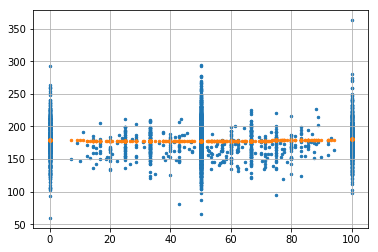

In [204]:
plt.scatter(X58, y, s=6) 
plt.scatter(X58, lr.predict(dfx58), s=6)
plt.grid()

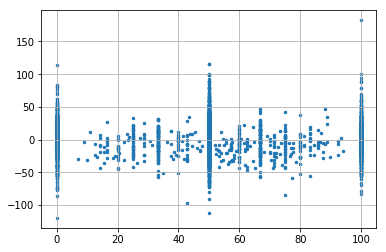

In [205]:
plt.scatter(X58, y - lr.predict(dfx58), s=6)
plt.grid()

In [206]:
X['PCT_FRMKT_FRVEG13_sqrd'] = X['PCT_FRMKT_FRVEG13']**2

In [207]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [208]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [209]:
lr.score(X_test, y_test)

0.5982922732775543

The squared version resulted in a decrease in accuracy, so it is dropped from X.

In [210]:
X = X.drop(columns = 'PCT_FRMKT_FRVEG13_sqrd')

## 'PCT_DIABETES_ADULTS09': Adult diabetes rate, 2009

In [211]:
X59 = np.array(cancer['PCT_DIABETES_ADULTS09'])
X59 = X59.reshape(-1, 1)

In [212]:
lr.fit(X59, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [213]:
lr.score(X59, y)

0.2732888154780303

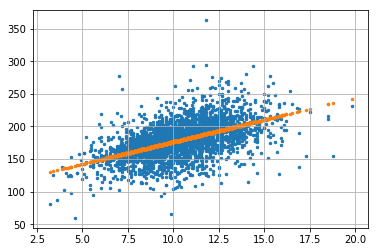

In [214]:
plt.scatter(X59, y, s=6)
plt.scatter(X59, lr.predict(X59), s=6)
plt.grid()

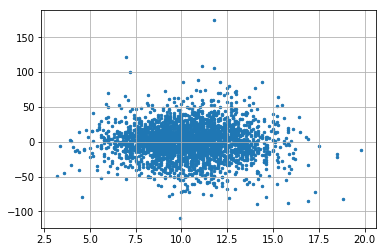

In [215]:
plt.scatter(X59, y - lr.predict(X59), s=6)
plt.grid()

In [216]:
X59.shape

(3047, 1)

In [217]:
dfx59 = pd.DataFrame(X59)
dfx59.head()

,0
0,13.2
1,9.6
2,12.4
3,6.8
4,10.5


In [218]:
dfx59['PCT_DIABETES_ADULTS09_log'] = np.log(X59)

In [219]:
dfx59.head()

,0,PCT_DIABETES_ADULTS09_log
0,13.2,2.580217
1,9.6,2.261763
2,12.4,2.517696
3,6.8,1.916923
4,10.5,2.351375


In [220]:
lr.fit(dfx59, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [221]:
lr.score(dfx59, y)

0.27596752864128193

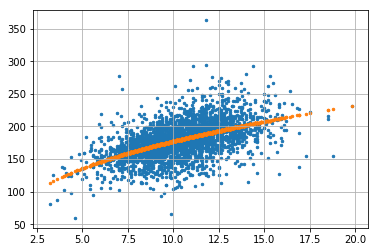

In [222]:
plt.scatter(X59, y, s=6) 
plt.scatter(X59, lr.predict(dfx59), s=6)
plt.grid()

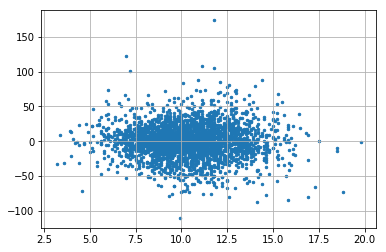

In [223]:
plt.scatter(X59, y - lr.predict(dfx59), s=6)
plt.grid()

In [224]:
dfx59['PCT_DIABETES_ADULTS09_sqrd'] = X59**2

In [225]:
dfx59.head()

,0,PCT_DIABETES_ADULTS09_log,PCT_DIABETES_ADULTS09_sqrd
0,13.2,2.580217,174.24
1,9.6,2.261763,92.16
2,12.4,2.517696,153.76
3,6.8,1.916923,46.24
4,10.5,2.351375,110.25


In [226]:
lr.fit(dfx59, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [227]:
lr.score(dfx59, y)

0.27712099981807725

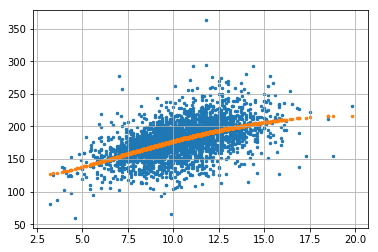

In [228]:
plt.scatter(X59, y, s=6) 
plt.scatter(X59, lr.predict(dfx59), s=6)
plt.grid()

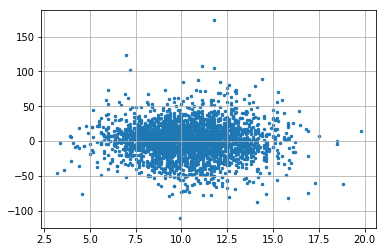

In [229]:
plt.scatter(X59, y - lr.predict(dfx59), s=6)
plt.grid()

In [230]:
X['PCT_DIABETES_ADULTS09_log'] = np.log(X['PCT_DIABETES_ADULTS09'])

In [231]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [232]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [233]:
lr.score(X_test, y_test)

0.5987076585628364

In [234]:
X = X.drop(columns = 'PCT_DIABETES_ADULTS09_log')

In [235]:
X['PCT_DIABETES_ADULTS09_sqrd'] = X['PCT_DIABETES_ADULTS09']**2

In [236]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [237]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [238]:
lr.score(X_test, y_test)

0.599230589135242

The squared version resulted in a decrease in accuracy, so it is dropped from X.

In [239]:
X = X.drop(columns = 'PCT_DIABETES_ADULTS09_sqrd')

## 'PCT_OBESE_ADULTS13': Adult obesity rate, 2013

In [240]:
X60 = np.array(cancer['PCT_OBESE_ADULTS13'])
X60 = X60.reshape(-1, 1)

In [241]:
lr.fit(X60, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [242]:
lr.score(X60, y)

0.18409719875879949

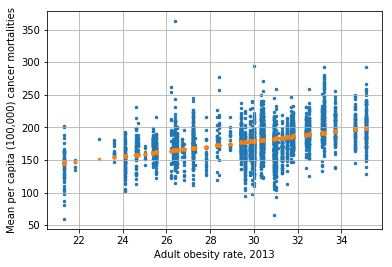

In [243]:
plt.scatter(X60, y, s=6)
plt.scatter(X60, lr.predict(X60), s=6)
plt.grid()
plt.xlabel("Adult obesity rate, 2013", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities", fontsize=10)
plt.savefig('PCT_OBESE_ADULTS13_actual_&_predicted_Y.png')

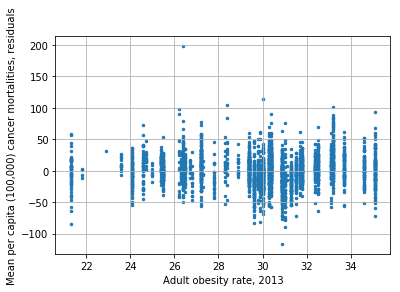

In [244]:
plt.scatter(X60, y - lr.predict(X60), s=6)
plt.grid()
plt.xlabel("Adult obesity rate, 2013", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities, residuals", fontsize=10)
plt.savefig('PCT_OBESE_ADULTS13_residuals.png')

In [245]:
X60.shape

(3047, 1)

In [246]:
dfx60 = pd.DataFrame(X60)
dfx60.head()

,0
0,31.7
1,33.1
2,27.2
3,29.6
4,31.3


In [247]:
dfx60['PCT_OBESE_ADULTS13_log'] = np.log(X60)

In [248]:
dfx60.head()

,0,PCT_OBESE_ADULTS13_log
0,31.7,3.456317
1,33.1,3.499533
2,27.2,3.303217
3,29.6,3.387774
4,31.3,3.443618


In [249]:
lr.fit(dfx60, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [250]:
lr.score(dfx60, y)

0.18810717825261536

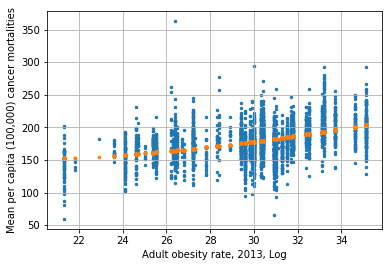

In [251]:
plt.scatter(X60, y, s=6) 
plt.scatter(X60, lr.predict(dfx60), s=6)
plt.grid()
plt.xlabel("Adult obesity rate, 2013, Log", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities", fontsize=10)
plt.savefig('PCT_OBESE_ADULTS13_log_actual_&_predicted_Y.png')

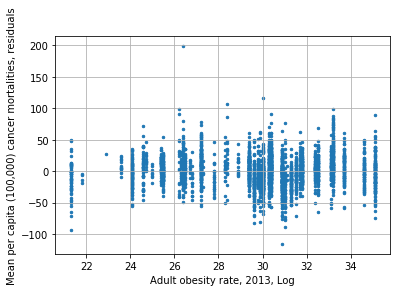

In [252]:
plt.scatter(X60, y - lr.predict(dfx60), s=6)
plt.grid()
plt.xlabel("Adult obesity rate, 2013, Log", fontsize=10)
plt.ylabel("Mean per capita (100,000) cancer mortalities, residuals", fontsize=10)
plt.savefig('PCT_OBESE_ADULTS13_log_residuals.png')

In [253]:
dfx60['PCT_OBESE_ADULTS13_sqrd'] = X60**2

In [254]:
dfx60.head()

,0,PCT_OBESE_ADULTS13_log,PCT_OBESE_ADULTS13_sqrd
0,31.7,3.456317,1004.89
1,33.1,3.499533,1095.61
2,27.2,3.303217,739.84
3,29.6,3.387774,876.16
4,31.3,3.443618,979.69


In [255]:
lr.fit(dfx60, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [256]:
lr.score(dfx60, y)

0.20006240273947928

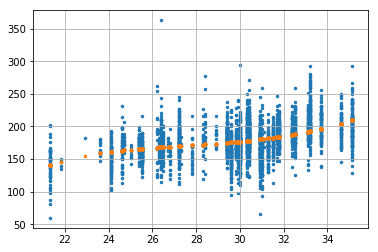

In [257]:
plt.scatter(X60, y, s=6) 
plt.scatter(X60, lr.predict(dfx60), s=6)
plt.grid()

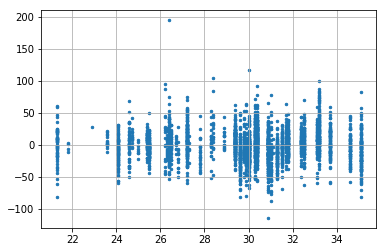

In [258]:
plt.scatter(X60, y - lr.predict(dfx60), s=6)
plt.grid()

In [259]:
X['PCT_OBESE_ADULTS13_log'] = np.log(X['PCT_OBESE_ADULTS13'])

In [260]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [261]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [262]:
lr.score(X_test, y_test)

0.6053660687721185

In [263]:
cancer['PCT_OBESE_ADULTS13_log'] = np.log(cancer['PCT_OBESE_ADULTS13'])

In [264]:
X['PCT_OBESE_ADULTS13_sqrd'] = X['PCT_OBESE_ADULTS13']**2

In [265]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [266]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [267]:
lr.score(X_test, y_test)

0.6051209982768485

The squared version resulted in a decrease in accuracy, so it is dropped from X.

In [268]:
X = X.drop(columns = 'PCT_OBESE_ADULTS13_sqrd')

## 'RECFAC12': Recreation & fitness facilities, 2012

In [269]:
X61 = np.array(cancer['RECFAC12'])
X61 = X61.reshape(-1, 1)

In [270]:
lr.fit(X61, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [271]:
lr.score(X61, y)

0.020238122895869348

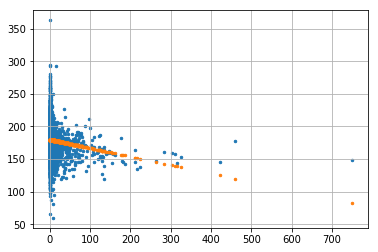

In [272]:
plt.scatter(X61, y, s=6)
plt.scatter(X61, lr.predict(X61), s=6)
plt.grid()

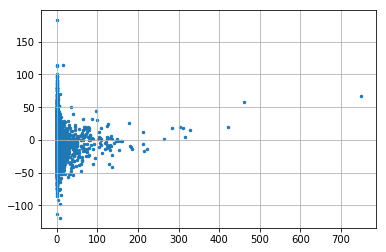

In [273]:
plt.scatter(X61, y - lr.predict(X61), s=6)
plt.grid()

In [274]:
X61.shape

(3047, 1)

In [275]:
dfx61 = pd.DataFrame(X61)
dfx61.head()

,0
0,0
1,5
2,1
3,43
4,1


There are zero values in 'RECFAC12', so a log version isn't possible.

In [276]:
dfx61['RECFAC12_sqrd'] = X61**2

In [277]:
dfx61.head()

,0,RECFAC12_sqrd
0,0,0
1,5,25
2,1,1
3,43,1849
4,1,1


In [278]:
lr.fit(dfx61, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [279]:
lr.score(dfx61, y)

0.027509458579598967

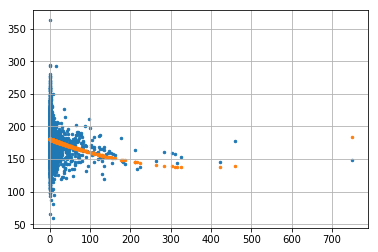

In [280]:
plt.scatter(X61, y, s=6) 
plt.scatter(X61, lr.predict(dfx61), s=6)
plt.grid()

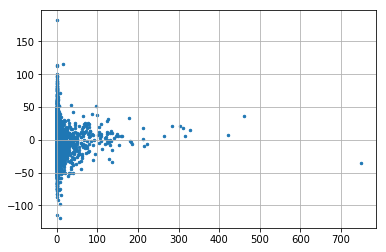

In [281]:
plt.scatter(X61, y - lr.predict(dfx61), s=6)
plt.grid()

In [282]:
X['RECFAC12_sqrd'] = X['RECFAC12']**2

In [283]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [284]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [285]:
lr.score(X_test, y_test)

0.60320323548809

The squared version resulted in a decrease in accuracy, so it is dropped from X.

In [286]:
X = X.drop(columns = 'RECFAC12_sqrd')

## 'NATAMEN': ERS natural amenity index, 1999

In [287]:
X62 = np.array(cancer['NATAMEN'])
X62 = X62.reshape(-1, 1)

In [288]:
lr.fit(X62, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [289]:
lr.score(X62, y)

0.0274599800434

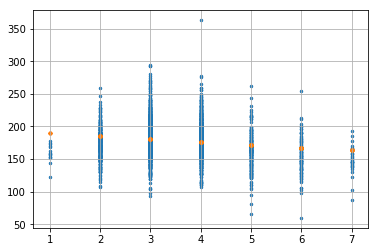

In [290]:
plt.scatter(X62, y, s=6)
plt.scatter(X62, lr.predict(X62), s=6)
plt.grid()

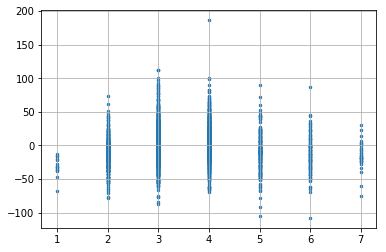

In [291]:
plt.scatter(X62, y - lr.predict(X62), s=6)
plt.grid()

In [292]:
X62.shape

(3047, 1)

In [293]:
dfx62 = pd.DataFrame(X62)
dfx62.head()

,0
0,3
1,3
2,4
3,4
4,3


In [294]:
dfx62['NATAMEN_log'] = np.log(X62)

In [295]:
dfx62.head()

,0,NATAMEN_log
0,3,1.098612
1,3,1.098612
2,4,1.386294
3,4,1.386294
4,3,1.098612


In [296]:
lr.fit(dfx62, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [297]:
lr.score(dfx62, y)

0.08637863303013871

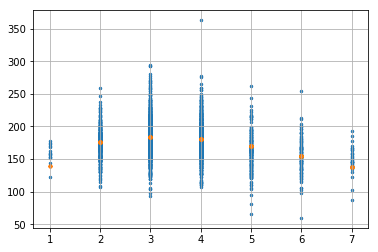

In [298]:
plt.scatter(X62, y, s=6) 
plt.scatter(X62, lr.predict(dfx62), s=6)
plt.grid()

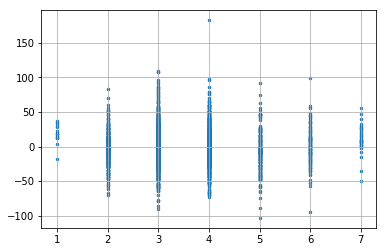

In [299]:
plt.scatter(X62, y - lr.predict(dfx62), s=6)
plt.grid()

In [300]:
dfx62['NATAMEN_sqrd'] = X62**2

In [301]:
dfx62.head()

,0,NATAMEN_log,NATAMEN_sqrd
0,3,1.098612,9
1,3,1.098612,9
2,4,1.386294,16
3,4,1.386294,16
4,3,1.098612,9


In [302]:
lr.fit(dfx62, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [303]:
lr.score(dfx62, y)

0.08639662870624609

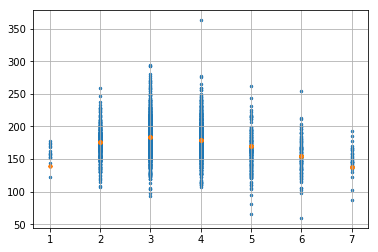

In [304]:
plt.scatter(X62, y, s=6) 
plt.scatter(X62, lr.predict(dfx62), s=6)
plt.grid()

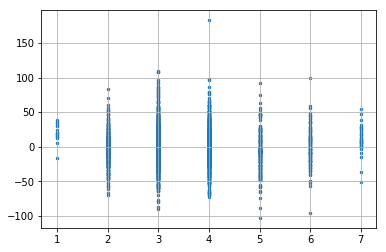

In [305]:
plt.scatter(X62, y - lr.predict(dfx62), s=6)
plt.grid()

In [306]:
X['NATAMEN_log'] = np.log(X['NATAMEN'])

In [307]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [308]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [309]:
lr.score(X_test, y_test)

0.565866028194931

In [310]:
X = X.drop(columns = 'NATAMEN_log')

In [311]:
X['NATAMEN_sqrd'] = X['NATAMEN']**2

In [312]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [313]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [314]:
lr.score(X_test, y_test)

0.5912275268737901

The squared version resulted in a decrease in accuracy, so it is dropped from X.

In [315]:
X = X.drop(columns = 'NATAMEN_sqrd')

## 'CHILDPOVRATE10': Child poverty rate, 2010

In [316]:
X63 = np.array(cancer['CHILDPOVRATE10'])
X63 = X63.reshape(-1, 1)

In [317]:
lr.fit(X63, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [318]:
lr.score(X63, y)

0.1983384497414301

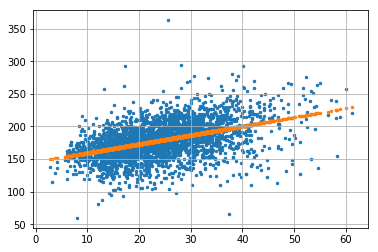

In [319]:
plt.scatter(X63, y, s=6)
plt.scatter(X63, lr.predict(X63), s=6)
plt.grid()

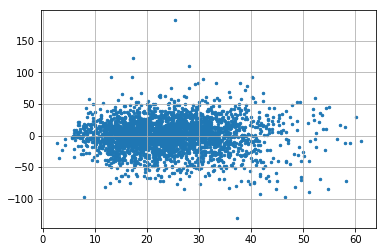

In [320]:
plt.scatter(X63, y - lr.predict(X63), s=6)
plt.grid()

In [321]:
X63.shape

(3047, 1)

In [322]:
dfx63 = pd.DataFrame(X63)
dfx63.head()

,0
0,26.6
1,29.6
2,28.7
3,16.1
4,14.1


In [323]:
dfx63['CHILDPOVRATE10_log'] = np.log(X63)

In [324]:
dfx63.head()

,0,CHILDPOVRATE10_log
0,26.6,3.280911
1,29.6,3.387774
2,28.7,3.356897
3,16.1,2.778819
4,14.1,2.646175


In [325]:
lr.fit(dfx63, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [326]:
lr.score(dfx63, y)

0.19966510454171127

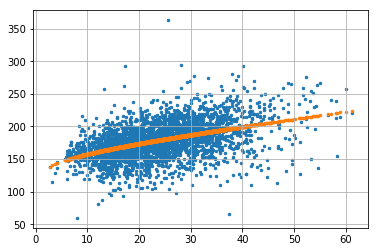

In [327]:
plt.scatter(X63, y, s=6) 
plt.scatter(X63, lr.predict(dfx63), s=6)
plt.grid()

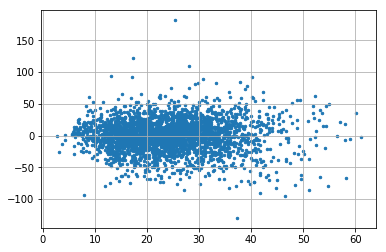

In [328]:
plt.scatter(X63, y - lr.predict(dfx63), s=6)
plt.grid()

In [329]:
dfx63['CHILDPOVRATE10_sqrd'] = X63**2

In [330]:
dfx63.head()

,0,CHILDPOVRATE10_log,CHILDPOVRATE10_sqrd
0,26.6,3.280911,707.56
1,29.6,3.387774,876.16
2,28.7,3.356897,823.69
3,16.1,2.778819,259.21
4,14.1,2.646175,198.81


In [331]:
lr.fit(dfx63, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [332]:
lr.score(dfx63, y)

0.20030991877157123

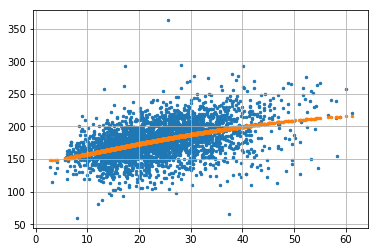

In [333]:
plt.scatter(X63, y, s=6) 
plt.scatter(X63, lr.predict(dfx63), s=6)
plt.grid()

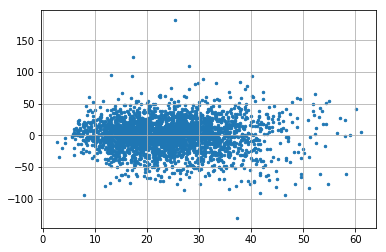

In [334]:
plt.scatter(X63, y - lr.predict(dfx63), s=6)
plt.grid()

In [335]:
X['CHILDPOVRATE10_log'] = np.log(X['CHILDPOVRATE10'])

In [336]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [337]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [338]:
lr.score(X_test, y_test)

0.5977456213665715

In [339]:
X = X.drop(columns = 'CHILDPOVRATE10_log')

In [340]:
X['CHILDPOVRATE10_sqrd'] = X['CHILDPOVRATE10']**2

In [341]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [342]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [343]:
lr.score(X_test, y_test)

0.5953952370443771

In [344]:
X = X.drop(columns = 'CHILDPOVRATE10_sqrd')

In [345]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [346]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [347]:
lr.score(X_test, y_test)

0.6053660687721185

In [348]:
#cancer.to_csv('cancer_ml6.csv')